In [12]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [2]:
ls

Fig_grape_vs_pop.pdf
cy_grape_fid_error_timeslices_10.hdf5
cy_grape_fid_error_timeslices_2.hdf5
cy_grape_fid_error_timeslices_4.hdf5
cy_grape_fid_error_timeslices_8.hdf5
plots.ipynb
pulseoptim_fid_error_timeslices_10.hdf5
pulseoptim_fid_error_timeslices_2.hdf5
pulseoptim_fid_error_timeslices_4.hdf5
pulseoptim_fid_error_timeslices_8.hdf5
results_PiecewiseConst.hdf5


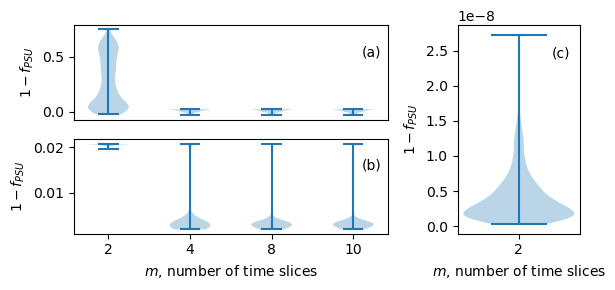

In [3]:
# Load data

def load_data(fname):
    with h5py.File(fname, 'r') as f:
        assert len(f.values()) == 1
        for data in f.values():
            return data[...]

timeslices = [2, 4, 8, 10]

cy_grape_fid_error = [
    load_data('cy_grape_fid_error_timeslices_{}.hdf5'.format(_)) for _ in timeslices
]    

fig = plt.figure(tight_layout=True, figsize=(6, 3))
gs = gridspec.GridSpec(2, 3)

ax1 = fig.add_subplot(gs[0, :2])

# GRAPE
ax1.violinplot(cy_grape_fid_error)
ax1.set_xticks([])
ax1.set_ylabel("$1 - f_{PSU}$")
ax1.text(4.1, 0.5, "(a)")

pulseoptim_fid_error = [
    load_data('pulseoptim_fid_error_timeslices_{}.hdf5'.format(_)) for _ in timeslices
]    

ax2 = fig.add_subplot(gs[1, :2])

# CRAB
ax2.violinplot(pulseoptim_fid_error)
ax2.set_xticks(range(1, len(timeslices) + 1), timeslices )
ax2.set_xlabel("$m$, number of time slices")
ax2.set_ylabel("$1 - f_{PSU}$")
ax2.text(4.1, 0.015, "(b)")

with h5py.File('results_PiecewiseConst.hdf5', 'r') as f:
    pop_fid_error = 1 - f['f_PSU'][...]

ax3 = fig.add_subplot(gs[:, 2])
ax3.violinplot(pop_fid_error)
ax3.set_xticks([1], [2])
ax3.set_xlabel("$m$, number of time slices")
ax3.set_ylabel("$1 - f_{PSU}$")
ax3.text(1.15, 2.4e-8, "(c)")

#plt.tight_layout()
plt.savefig("Fig_grape_vs_pop.pdf")
plt.show()

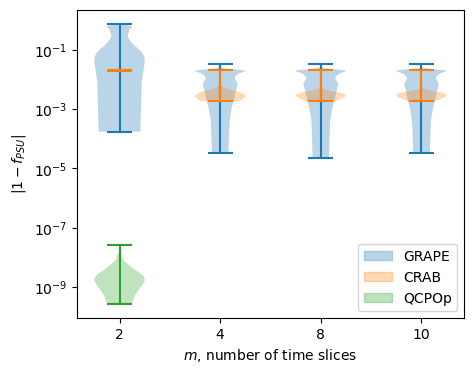

In [40]:
import matplotlib.patches as mpatches

plt.figure(figsize=(5, 4))

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

# GRAPE
add_label(plt.violinplot([np.abs(_) for _ in cy_grape_fid_error]), "GRAPE")    

add_label(plt.violinplot([np.abs(_) for _ in pulseoptim_fid_error]), "CRAB")

add_label(plt.violinplot(pop_fid_error), "QCPOp")

plt.yscale('log')

plt.xticks(range(1, len(timeslices) + 1), timeslices )
plt.xlabel("$m$, number of time slices")

plt.ylabel("$|1 - f_{PSU}|$")

plt.legend(*zip(*labels), loc=4)

plt.savefig("Fig_grape_crab_vs_pop.pdf")

plt.show()